In [22]:
import random
import datetime
import numpy as np
import pandas as pd
from random import randrange
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize' : 'small',
          'figure.figsize' : (10,5),
          'axes.labelsize' : 'medium',
          'axes.titlesize' : 'medium',
          'xtick.labelsize' : 'medium',
          'ytick.labelsize' : 'medium'}

plt.rcParams.update(params)
from IPython.display import display, HTML


def _random_date(start,date_count):
    current = start
    while date_count > 0:
        curr = current + datetime.timedelta(days = randrange(42))
        #return curr
        yield curr
        date_count -= 1

def generate_sample_data(row_count=100):
    #sentinels
    startDate = datetime.datetime(2016, 1, 1,13)
    serial_number_sentinel = 1000
    User_id_sentinel = 5001
    product_id_sentinel = 101
    price_sentinel = 2000

    # base list attributes
    data_dict = {
        'Serial No' : np.arange(row_count) + serial_number_sentinel,
        'Date': np.random.permutation(pd.to_datetime([x.strftime("%d-%m-%y")
                for x in _random_date(startDate,row_count)]).date),
        'User ID' : np.random.permutation(np.random.randint(0,row_count,size = int(row_count/10)) + product_id_sentinel).tolist()*10,
        'Product ID' : np.random.permutation(np.random.randint(0,row_count,size = int(row_count/10)) + product_id_sentinel).tolist()*10,
        'Quantity Purchased': np.random.permutation(np.random.randint(1,42,size=row_count)),
        'Price' : np.round(np.abs(np.random.randn(row_count) + 1) * price_sentinel),
        'User Type' : np.random.permutation([chr(random.randrange(97,97 + 3 + 1))
            for i in range(row_count)])
        }
    #indroduce missing variables
    for index in range(int(np.sqrt(row_count))):
        data_dict['Price'][np.argmax(data_dict['Price'] == random.choice(data_dict['Price']))] = np.nan
        data_dict['User Type'][np.argmax(data_dict['User Type'] == random.choice(data_dict['User Type']))] = np.nan
        data_dict['Date'][np.argmax(data_dict['Date'] == random.choice(data_dict['Date']))] = np.nan
        data_dict['Product ID'][np.argmax(data_dict['Product ID'] == random.choice(data_dict['Product ID']))] = 0
        data_dict['Serial No'][np.argmax(data_dict['Serial No'] == random.choice(data_dict['Serial No']))] = -1
        data_dict['User ID'][np.argmax(data_dict['User ID'] == random.choice(data_dict['User ID']))] = -101

    df = pd.DataFrame(data_dict)
    return df

def cleanup_column_names(df,rename_dict={},do_inplace=True):

    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(column = rename_dict,inplace = do_inplace)

def expand_user_type(u_type):
    if u_type in ['a','b']:
        return 'new'
    elif u_type == 'c':
        return 'existing'
    elif u_type == 'd':
        return 'loyal_existing'
    else:
        return 'error'


df = generate_sample_data(row_count = 1000)
cleanup_column_names(df)

df['date'] = pd.to_datetime(df.date)

df['user_class'] = df['user_type'].map(expand_user_type)

df['purchase_week'] = df[['date']].applymap(lambda dt:dt.week 
    if not pd.isnull(dt.week)
    else 0)

df = df.dropna(subset=['date'])
df['price'].fillna(value=np.round(df.price.mean(),decimals=2),inplace=True)

print(df.head())


   serial_no       date  user_id  product_id  quantity_purchased   price  \
1       1001 2016-01-01      613         107                  28  2088.0   
3       1003 2016-01-25      207         237                   4   165.0   
4       1004 2016-01-19      527         761                  11  1472.0   
5       1005 2016-01-19      450         983                  24   550.0   
6       1006 2016-09-01     1069         861                   9  1214.0   

  user_type user_class  purchase_week  
1         n      error             53  
3         n      error              4  
4         n      error              3  
5         n      error              3  
6         n      error             35  


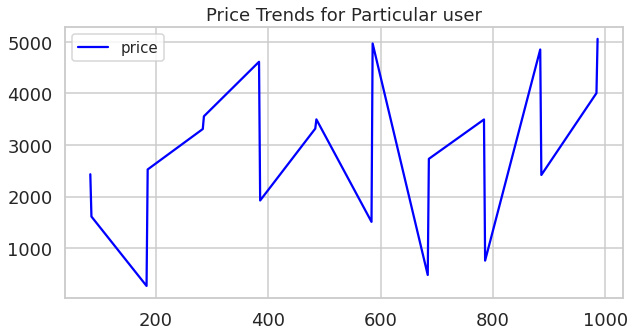

In [23]:
max_user_id = df.user_id.value_counts().index[0]
df[df.user_id == max_user_id][['price']].plot(style = 'blue')
plt.title('Price Trends for Particular user')
plt.show()

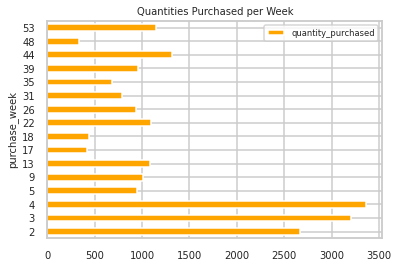

In [3]:
df[["purchase_week","quantity_purchased"]].groupby('purchase_week').sum().plot.barh(color = 'orange')
plt.title('Quantities Purchased per Week')
plt.show()


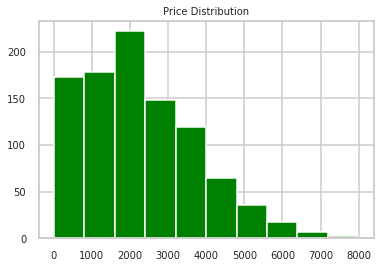

In [4]:
df.price.hist(color = 'green')
plt.title('Price Distribution')
plt.show()


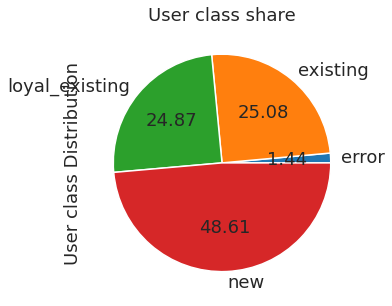

In [9]:
class_series = df.groupby('user_class').size()
class_series.name = "User class Distribution"
class_series.plot.pie(autopct = '%.2f')
plt.title("User class share")
plt.show()


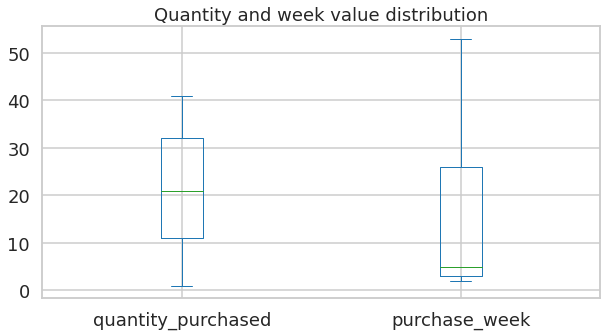

In [11]:
df[['quantity_purchased','purchase_week']].plot.box()
plt.title("Quantity and week value distribution")
plt.show()